In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from io import StringIO

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]
pd.plotting.register_matplotlib_converters()
plt.style.use('seaborn-dark')

In [3]:
download_link = 'https://www.arcgis.com/sharing/rest/content/items/f10774f1c63e40168479a1feb6c7ca74/data'
# see https://www.arcgis.com/home/item.html?id=dd4580c810204019a7b8eb3e0b329dd6
# new source https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74

In [4]:
req = requests.get(download_link)
rki_raw = pd.read_csv(StringIO(req.text))

In [5]:
rki_raw.tail()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
1924840,1924841,16,Thüringen,LK Altenburger Land,A80+,W,3,0,2021/05/08 00:00:00,16077,"14.05.2021, 00:00 Uhr",0,-9,2021/05/08 00:00:00,-9,0,0,Nicht übermittelt
1924841,1924842,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021/05/09 00:00:00,16077,"14.05.2021, 00:00 Uhr",0,-9,2021/05/09 00:00:00,-9,0,0,Nicht übermittelt
1924842,1924843,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021/05/11 00:00:00,16077,"14.05.2021, 00:00 Uhr",0,-9,2021/05/11 00:00:00,-9,0,0,Nicht übermittelt
1924843,1924844,16,Thüringen,LK Altenburger Land,unbekannt,W,1,0,2021/04/06 00:00:00,16077,"14.05.2021, 00:00 Uhr",0,-9,2021/04/06 00:00:00,0,1,0,Nicht übermittelt
1924844,1924845,16,Thüringen,LK Altenburger Land,unbekannt,W,1,1,2021/05/05 00:00:00,16077,"14.05.2021, 00:00 Uhr",0,0,2021/05/05 00:00:00,-9,0,0,Nicht übermittelt


In [6]:
set(rki_raw['Altersgruppe'])

{'A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt'}

In [7]:
set(rki_raw['Bundesland'])

{'Baden-Württemberg',
 'Bayern',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hessen',
 'Mecklenburg-Vorpommern',
 'Niedersachsen',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Saarland',
 'Sachsen',
 'Sachsen-Anhalt',
 'Schleswig-Holstein',
 'Thüringen'}

In [8]:
rki_raw

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,1,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/09/30 00:00:00,1001,"14.05.2021, 00:00 Uhr",0,-9,2020/09/30 00:00:00,0,1,0,Nicht übermittelt
1,2,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/10/29 00:00:00,1001,"14.05.2021, 00:00 Uhr",0,-9,2020/10/29 00:00:00,0,1,0,Nicht übermittelt
2,3,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/03 00:00:00,1001,"14.05.2021, 00:00 Uhr",0,-9,2020/11/03 00:00:00,0,1,0,Nicht übermittelt
3,4,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/20 00:00:00,1001,"14.05.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00,0,1,1,Nicht übermittelt
4,5,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/23 00:00:00,1001,"14.05.2021, 00:00 Uhr",0,-9,2020/11/18 00:00:00,0,1,1,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924840,1924841,16,Thüringen,LK Altenburger Land,A80+,W,3,0,2021/05/08 00:00:00,16077,"14.05.2021, 00:00 Uhr",0,-9,2021/05/08 00:00:00,-9,0,0,Nicht übermittelt
1924841,1924842,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021/05/09 00:00:00,16077,"14.05.2021, 00:00 Uhr",0,-9,2021/05/09 00:00:00,-9,0,0,Nicht übermittelt
1924842,1924843,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021/05/11 00:00:00,16077,"14.05.2021, 00:00 Uhr",0,-9,2021/05/11 00:00:00,-9,0,0,Nicht übermittelt
1924843,1924844,16,Thüringen,LK Altenburger Land,unbekannt,W,1,0,2021/04/06 00:00:00,16077,"14.05.2021, 00:00 Uhr",0,-9,2021/04/06 00:00:00,0,1,0,Nicht übermittelt


In [9]:
rki_raw_60 = rki_raw[~rki_raw.Altersgruppe.isin(['A60-A79', 'A80+'])].copy()

In [10]:
rki_raw_under60 = rki_raw[~rki_raw.Altersgruppe.isin(['A60-A79', 'A80+'])].copy()

In [11]:
rki_raw_35_59 = rki_raw[rki_raw.Altersgruppe.isin(['A35-A59'])].copy()

In [12]:
rki_raw_35_59_death = rki_raw_35_59[rki_raw_35_59.NeuerTodesfall.isin([0, 1])].copy()

In [13]:
rki_raw_35_59['AnzahlTodesfall'].sum()

3364

In [14]:
rki_death_mv = rki_raw_35_59_death[rki_raw_35_59_death.Bundesland.isin(['Mecklenburg-Vorpommern'])].copy()

In [15]:
rki_death_mv['AnzahlTodesfall'].sum()

38

In [16]:
rki_death_mv.sort_values(by='Meldedatum')

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
1676992,1676993,13,Mecklenburg-Vorpommern,LK Ludwigslust-Parchim,A35-A59,M,1,1,2020/03/28 00:00:00,13076,"14.05.2021, 00:00 Uhr",0,0,2020/03/20 00:00:00,-9,0,1,Nicht übermittelt
1652448,1652449,13,Mecklenburg-Vorpommern,SK Rostock,A35-A59,W,1,1,2020/04/07 00:00:00,13003,"14.05.2021, 00:00 Uhr",0,0,2020/04/01 00:00:00,-9,0,1,Nicht übermittelt
1667888,1667889,13,Mecklenburg-Vorpommern,LK Vorpommern-Greifswald,A35-A59,M,1,1,2020/04/07 00:00:00,13075,"14.05.2021, 00:00 Uhr",0,0,2020/04/06 00:00:00,-9,0,1,Nicht übermittelt
1667965,1667966,13,Mecklenburg-Vorpommern,LK Vorpommern-Greifswald,A35-A59,M,1,1,2020/11/11 00:00:00,13075,"14.05.2021, 00:00 Uhr",0,0,2020/11/10 00:00:00,-9,0,1,Nicht übermittelt
1667969,1667970,13,Mecklenburg-Vorpommern,LK Vorpommern-Greifswald,A35-A59,M,1,1,2020/11/12 00:00:00,13075,"14.05.2021, 00:00 Uhr",0,0,2020/11/08 00:00:00,-9,0,1,Nicht übermittelt
1662941,1662942,13,Mecklenburg-Vorpommern,LK Vorpommern-Rügen,A35-A59,M,1,1,2020/12/01 00:00:00,13073,"14.05.2021, 00:00 Uhr",0,0,2020/11/28 00:00:00,-9,0,1,Nicht übermittelt
1659256,1659257,13,Mecklenburg-Vorpommern,LK Rostock,A35-A59,M,1,1,2021/01/05 00:00:00,13072,"14.05.2021, 00:00 Uhr",0,0,2021/01/05 00:00:00,-9,0,0,Nicht übermittelt
1675547,1675548,13,Mecklenburg-Vorpommern,LK Ludwigslust-Parchim,A35-A59,W,1,1,2021/01/09 00:00:00,13076,"14.05.2021, 00:00 Uhr",0,0,2021/01/08 00:00:00,-9,0,1,Nicht übermittelt
1656048,1656049,13,Mecklenburg-Vorpommern,LK Mecklenburgische Seenplatte,A35-A59,W,1,1,2021/01/11 00:00:00,13071,"14.05.2021, 00:00 Uhr",0,0,2021/01/03 00:00:00,-9,0,1,Nicht übermittelt
1659281,1659282,13,Mecklenburg-Vorpommern,LK Rostock,A35-A59,M,1,1,2021/01/12 00:00:00,13072,"14.05.2021, 00:00 Uhr",0,0,2021/01/04 00:00:00,-9,0,1,Nicht übermittelt


In [17]:
rki_raw_80 = rki_raw[rki_raw.Altersgruppe.isin(['A80+'])].copy()

In [18]:
rki_raw_80_death = rki_raw_80[rki_raw_80.NeuerTodesfall.isin([0, 1])].copy()

In [19]:
rki_raw_80_death.sort_values(by='Meldedatum').tail()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
558028,558029,5,Nordrhein-Westfalen,SK Hagen,A80+,M,1,1,2021/05/11 00:00:00,5914,"14.05.2021, 00:00 Uhr",0,0,2021/05/09 00:00:00,-9,0,1,Nicht übermittelt
1892321,1892322,16,Thüringen,LK Gotha,A80+,M,1,1,2021/05/12 00:00:00,16067,"14.05.2021, 00:00 Uhr",0,0,2021/05/12 00:00:00,-9,0,0,Nicht übermittelt
1914784,1914785,16,Thüringen,LK Saale-Holzland-Kreis,A80+,M,1,1,2021/05/12 00:00:00,16074,"14.05.2021, 00:00 Uhr",0,0,2021/05/12 00:00:00,-9,0,0,Nicht übermittelt
1473921,1473922,10,Saarland,LK Merzig-Wadern,A80+,W,1,1,2021/05/12 00:00:00,10042,"14.05.2021, 00:00 Uhr",0,0,2021/05/12 00:00:00,-9,0,0,Nicht übermittelt
1261135,1261136,9,Bayern,LK Rottal-Inn,A80+,W,1,1,2021/05/13 00:00:00,9277,"14.05.2021, 00:00 Uhr",1,1,2021/05/13 00:00:00,-9,0,0,Nicht übermittelt


In [20]:
def new_cases_by_date(rki_raw, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall'):
    """
    rki_raw: raw DataFrame from Robert Koch Institute
    """
    condition = rki_raw[rki_flag_column].isin((0, 1))
    rki_series = rki_raw[condition].groupby('Meldedatum').sum()[rki_count_columns].copy()
    rki_series.index = pd.to_datetime(rki_series.index)
    rki_series.sort_index(inplace=True)
    return rki_series

In [21]:
def process_raw_df(raw_df):
    rki_cases = new_cases_by_date(raw_df, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')
    rki_death = new_cases_by_date(raw_df, rki_flag_column='NeuerTodesfall', rki_count_columns='AnzahlTodesfall')
    rki_recovered = new_cases_by_date(raw_df, rki_flag_column='NeuGenesen', rki_count_columns='AnzahlGenesen')
    rki_df = pd.concat([rki_cases, rki_death, rki_recovered], axis=1, sort=True)
    columns_dict = {'AnzahlFall': 'NewCases', 'AnzahlTodesfall': 'NewDeathRKI', 'AnzahlGenesen': 'NewRecoveredRKI'}
    rki_df.rename(columns_dict, axis=1, inplace=True)
    rki_df['Case Fatality'] = rki_df.NewDeathRKI / rki_df.NewCases * 100
    rki_df.replace(np.nan, 0, inplace=True)
    return rki_df

In [22]:
age_groups = set(rki_raw['Altersgruppe'])
age_groups

{'A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt'}

In [23]:
def rolling_average(rki_df):
    rki_df = rki_df.rolling(7).sum() / 7
    return rki_df

In [24]:
def stratify_by_age(raw_df, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall'):
    age_groups = set(raw_df['Altersgruppe'])
    age_groups_list = []
    for age_group in age_groups:
        rki_raw_age = raw_df[raw_df.Altersgruppe.isin([age_group])].copy()
        rki_cases = new_cases_by_date(rki_raw_age, rki_flag_column=rki_flag_column, rki_count_columns=rki_count_columns)
        rki_cases.name = age_group
        age_groups_list.append(rki_cases)
    age_groups_df = pd.concat(age_groups_list, axis=1, sort=True)
    age_groups_df.replace(np.nan, 0, inplace=True)
    age_groups_df = age_groups_df.rolling(7).sum() / 7
    return age_groups_df



In [25]:
rki_flag_column='NeuerFall'
rki_count_columns='AnzahlFall'
rki_raw_age2 = rki_raw[rki_raw.Altersgruppe.isin(['A00-A04'])].copy()
rki_cases2 = new_cases_by_date(rki_raw_age2)

In [26]:
age_groups_df = stratify_by_age(rki_raw)

In [27]:
age_groups_df = age_groups_df.reindex(sorted(age_groups_df.columns), axis=1)

In [28]:
age_groups_df = rolling_average(age_groups_df)

In [29]:
rki_raw_kln = rki_raw[rki_raw.Landkreis.isin(['SK Köln'])].copy()
rki_raw_kln.tail()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
361993,361994,5,Nordrhein-Westfalen,SK Köln,unbekannt,W,1,0,2021/04/23 00:00:00,5315,"14.05.2021, 00:00 Uhr",0,-9,2021/04/23 00:00:00,-9,0,0,Nicht übermittelt
361994,361995,5,Nordrhein-Westfalen,SK Köln,unbekannt,W,1,0,2021/04/24 00:00:00,5315,"14.05.2021, 00:00 Uhr",0,-9,2021/04/24 00:00:00,-9,0,0,Nicht übermittelt
361995,361996,5,Nordrhein-Westfalen,SK Köln,unbekannt,W,1,0,2021/04/25 00:00:00,5315,"14.05.2021, 00:00 Uhr",0,-9,2021/04/25 00:00:00,-9,0,0,Nicht übermittelt
361996,361997,5,Nordrhein-Westfalen,SK Köln,unbekannt,W,1,0,2021/05/03 00:00:00,5315,"14.05.2021, 00:00 Uhr",0,-9,2021/05/03 00:00:00,-9,0,0,Nicht übermittelt
361997,361998,5,Nordrhein-Westfalen,SK Köln,unbekannt,W,1,0,2021/05/04 00:00:00,5315,"14.05.2021, 00:00 Uhr",0,-9,2021/05/04 00:00:00,-9,0,0,Nicht übermittelt


In [30]:
rki_kln_cases = new_cases_by_date(rki_raw_kln, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')


In [31]:
rki_kln_incidence = rki_kln_cases.rolling(7).sum() / 1017000 * 100000

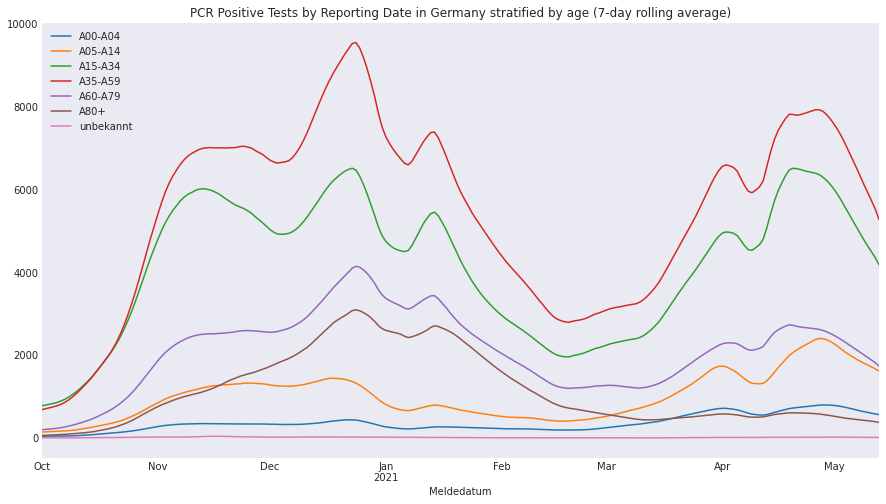

In [32]:
age_groups_df['10-01-2020':].plot()
plt.title('PCR Positive Tests by Reporting Date in Germany stratified by age (7-day rolling average)')
plt.legend(loc='upper left')

In [33]:
age_groups_df.tail(10)

,A00-A04,A05-A14,A15-A34,A35-A59,A60-A79,A80+,unbekannt
Meldedatum,,,,,,,
2021-05-04,740.408163,2067.959184,5551.693878,7082.897959,2306.163265,478.836735,18.551020
2021-05-05,720.000000,2008.326531,5396.734694,6892.122449,2247.326531,467.632653,17.448980
2021-05-06,698.265306,1951.469388,5235.020408,6701.469388,2186.816327,457.122449,16.653061
2021-05-07,674.755102,1899.081633,5078.857143,6505.816327,2126.040816,446.387755,15.755102
2021-05-08,653.857143,1850.122449,4920.448980,6303.591837,2063.489796,436.040816,15.183673
2021-05-09,634.122449,1801.632653,4769.408163,6103.183673,2001.938776,426.857143,14.857143
2021-05-10,616.448980,1758.346939,4625.122449,5910.551020,1941.734694,419.081633,14.571429
2021-05-11,598.632653,1713.285714,4488.081633,5717.632653,1878.897959,406.897959,14.673469
2021-05-12,581.938776,1667.857143,4346.551020,5514.877551,1813.591837,393.183673,14.693878


In [34]:
rki_under60 = process_raw_df(rki_raw_60)
rki_under60.tail()

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality
Meldedatum,,,,
2021-05-09,4515,0.0,148,0.000000
2021-05-10,6111,2.0,140,0.032728
2021-05-11,14167,3.0,153,0.021176
2021-05-12,13446,0.0,98,0.000000
2021-05-13,6540,0.0,28,0.000000


In [35]:
rki_raw_under14 = rki_raw[rki_raw.Altersgruppe.isin(['A00-A04', 'A05-A14'])].copy()
rki_under14 = process_raw_df(rki_raw_under14)
rki_under14.tail()

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality
Meldedatum,,,,
2021-05-09,865,0.0,19,0.0
2021-05-10,1101,0.0,22,0.0
2021-05-11,2534,0.0,24,0.0
2021-05-12,2651,0.0,11,0.0
2021-05-13,1399,0.0,4,0.0


In [36]:
rki_under14.NewDeathRKI.sum()

14.0

In [37]:
set(rki_raw['Altersgruppe'])

{'A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt'}

In [38]:
rki_raw_under80 = rki_raw[~rki_raw.Altersgruppe.isin(['A80+'])].copy()
rki_under80 = process_raw_df(rki_raw_under80)
rki_under80.tail()

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality
Meldedatum,,,,
2021-05-09,5148,1.0,175,0.019425
2021-05-10,7054,5.0,157,0.070882
2021-05-11,16220,6.0,182,0.036991
2021-05-12,15479,1.0,112,0.006460
2021-05-13,7479,3.0,34,0.040112


In [39]:
rki_raw_60to80 = rki_raw[rki_raw.Altersgruppe.isin(['A60-A79'])].copy()
rki_60to80 = process_raw_df(rki_raw_60to80)
rki_60to80.tail()

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality
Meldedatum,,,,
2021-05-09,633,1.0,27.0,0.157978
2021-05-10,943,3.0,17.0,0.318134
2021-05-11,2053,3.0,29.0,0.146128
2021-05-12,2033,1.0,14.0,0.049188
2021-05-13,939,3.0,6.0,0.319489


In [40]:
rki = process_raw_df(rki_raw)
# using estimates for recovery dates and death dates
shift_recovery = 14 # days
shift_death = 20 # days
rki['NewRecovered'] = rki.NewRecoveredRKI.shift(shift_recovery).fillna(0)
rki['NewDeath'] = rki.NewDeathRKI.shift(shift_death).fillna(0)
s = rki['NewRecoveredRKI'].copy()
s.values[:-shift_recovery] = 0.
rki['NewRecovered'] += s
s = rki['NewDeathRKI'].copy()
s.values[:-shift_death] = 0.
rki['NewDeath'] += s
rki.fillna(value=0., inplace=True)
rki.tail()

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality,NewRecovered,NewDeath
Meldedatum,,,,,,
2021-05-09,5312,6.0,177,0.112952,5852.0,146.0
2021-05-10,7285,13.0,159,0.178449,8338.0,209.0
2021-05-11,16624,10.0,184,0.060154,17419.0,186.0
2021-05-12,15871,4.0,112,0.025203,17142.0,181.0
2021-05-13,7682,4.0,34,0.052070,14724.0,145.0


In [41]:
rki80 = process_raw_df(rki_raw_80) # only age 80+
rki80.tail()

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality
Meldedatum,,,,
2021-05-09,164,5.0,2.0,3.048780
2021-05-10,231,8.0,2.0,3.463203
2021-05-11,404,4.0,2.0,0.990099
2021-05-12,392,3.0,0.0,0.765306
2021-05-13,203,1.0,0.0,0.492611


Text(0.5, 1.0, 'Case Fatality Germany for cases aged 80 or above (%)')

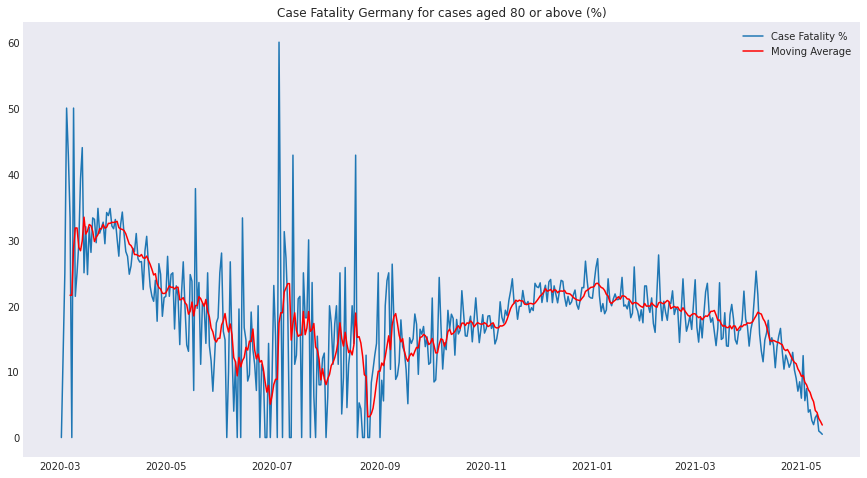

In [42]:
#rki60er['Case Fatality']['10-01-2020':].plot.bar()
start_date = '03-01-2020'
x = rki80[start_date:].index
plt.plot(x, rki80['Case Fatality'][start_date:], label='Case Fatality %')
plt.plot(x, rki80['Case Fatality'].rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality Germany for cases aged 80 or above (%)')

In [43]:
rki['Cases'] = rki['NewCases'].cumsum()
rki['Death'] = rki['NewDeath'].cumsum()
rki['Recovered'] = rki['NewRecovered'].cumsum()
rki['ActiveCases'] = rki['Cases'] - rki['Recovered'] - rki['Death']
rki['Growth'] = rki['NewCases'] / rki['ActiveCases']
rki.tail(10)

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality,NewRecovered,NewDeath,Cases,Death,Recovered,ActiveCases,Growth
Meldedatum,,,,,,,,,,,
2021-05-04,21008,64.0,3947,0.304646,24133.0,290.0,3458646,84255.0,3122800.0,251591.0,0.083501
2021-05-05,20909,48.0,2769,0.229566,23797.0,242.0,3479555,84497.0,3146597.0,248461.0,0.084154
2021-05-06,17192,34.0,1481,0.197766,19246.0,202.0,3496747,84699.0,3165843.0,246205.0,0.069828
2021-05-07,15487,22.0,823,0.142055,16749.0,166.0,3512234,84865.0,3182592.0,244777.0,0.063270
2021-05-08,12032,11.0,393,0.091423,12937.0,116.0,3524266,84981.0,3195529.0,243756.0,0.049361
2021-05-09,5312,6.0,177,0.112952,5852.0,146.0,3529578,85127.0,3201381.0,243070.0,0.021854
2021-05-10,7285,13.0,159,0.178449,8338.0,209.0,3536863,85336.0,3209719.0,241808.0,0.030127
2021-05-11,16624,10.0,184,0.060154,17419.0,186.0,3553487,85522.0,3227138.0,240827.0,0.069029
2021-05-12,15871,4.0,112,0.025203,17142.0,181.0,3569358,85703.0,3244280.0,239375.0,0.066302


Text(0.5, 1.0, 'Neue Fälle RKI nach Meldedatum')

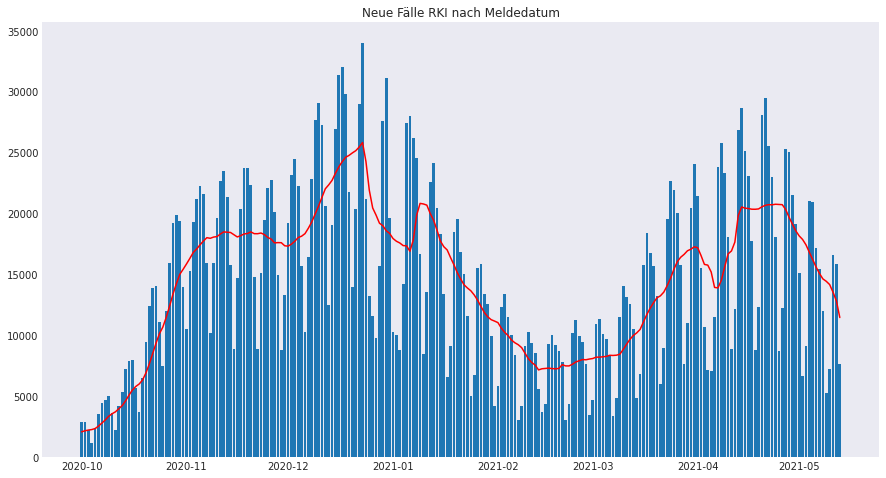

In [44]:
start_date = '10-01-2020'
x = rki[start_date:].index
plt.bar(x, rki.NewCases[start_date:], label='Growth')
plt.plot(x, rki.NewCases.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.title("Neue Fälle RKI nach Meldedatum")

Text(0.5, 1.0, 'Inzidenz DE')

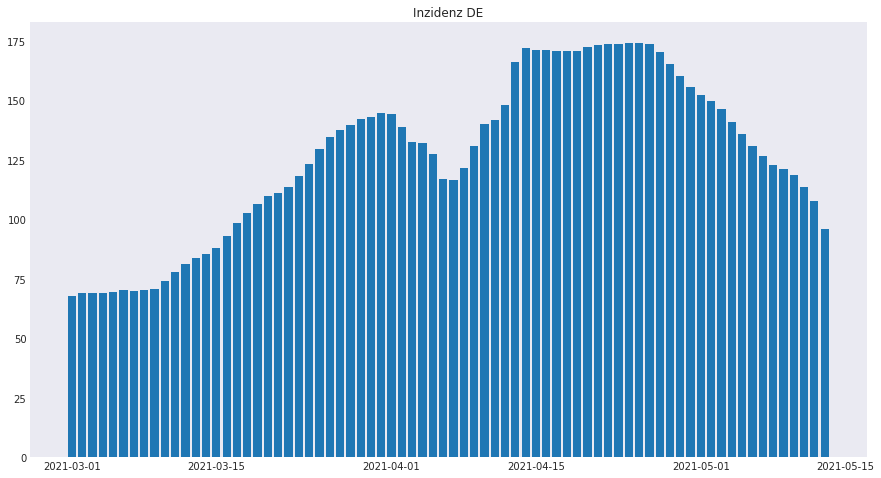

In [45]:

incidence = rki.NewCases.rolling(7).sum() /  83450000 * 100000
start_date = '03-01-2021'
x = incidence[start_date:].index
plt.bar(x, incidence[start_date:])
plt.title("Inzidenz DE")

In [46]:
incidence.tail(20)

Meldedatum
2021-04-24    174.182145
2021-04-25    174.055123
2021-04-26    173.893349
2021-04-27    170.597963
2021-04-28    165.292990
2021-04-29    160.473337
2021-04-30    155.888556
2021-05-01    152.395446
2021-05-02    149.954464
2021-05-03    146.274416
2021-05-04    141.115638
2021-05-05    136.115039
2021-05-06    130.951468
2021-05-07    126.522469
2021-05-08    122.804074
2021-05-09    121.139605
2021-05-10    118.903535
2021-05-11    113.650090
2021-05-12    107.612942
2021-05-13     96.216896
Name: NewCases, dtype: float64

<AxesSubplot:xlabel='Meldedatum'>

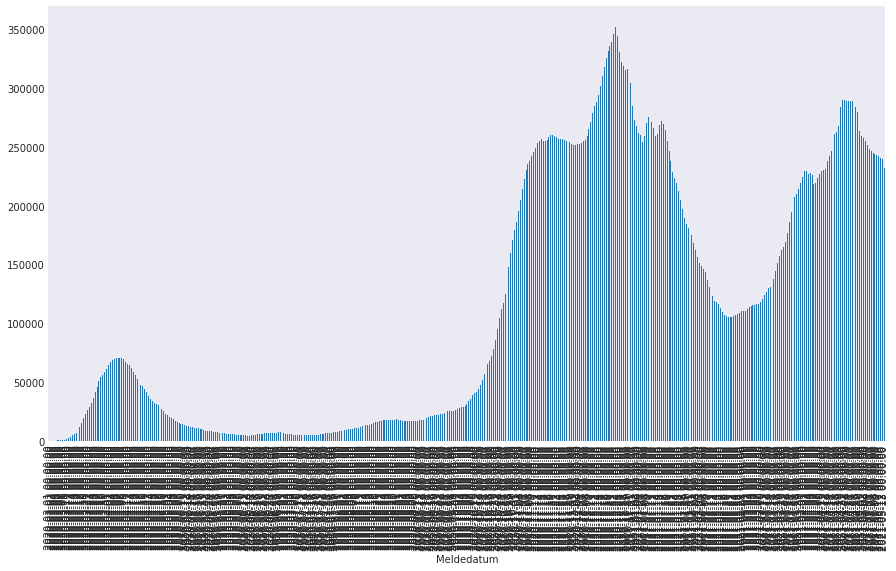

In [47]:
rki.ActiveCases['03-01-2020':].plot.bar()

<AxesSubplot:xlabel='Meldedatum'>

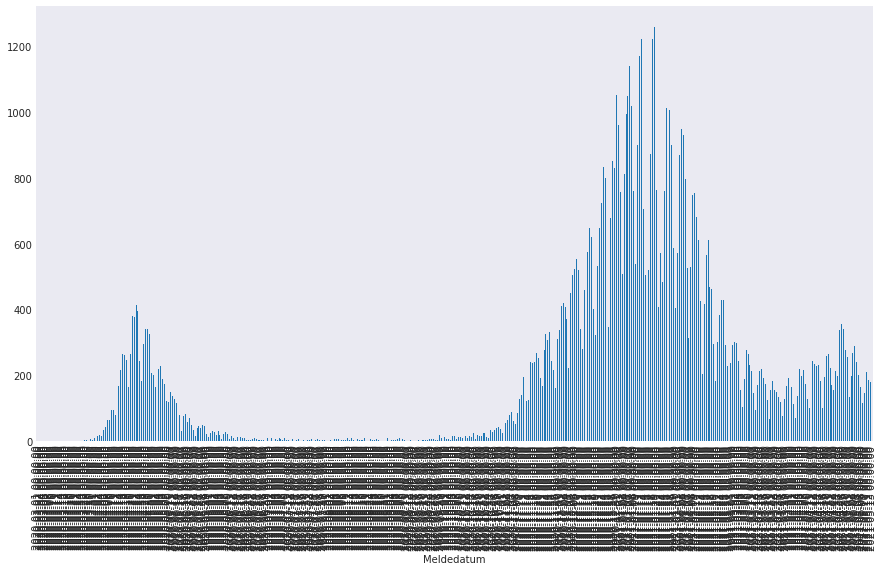

In [48]:
rki.NewDeath['03-01-2020':].plot.bar()

Text(0.5, 1.0, 'RKI recorded fatalities by PCR reporting date in Germany')

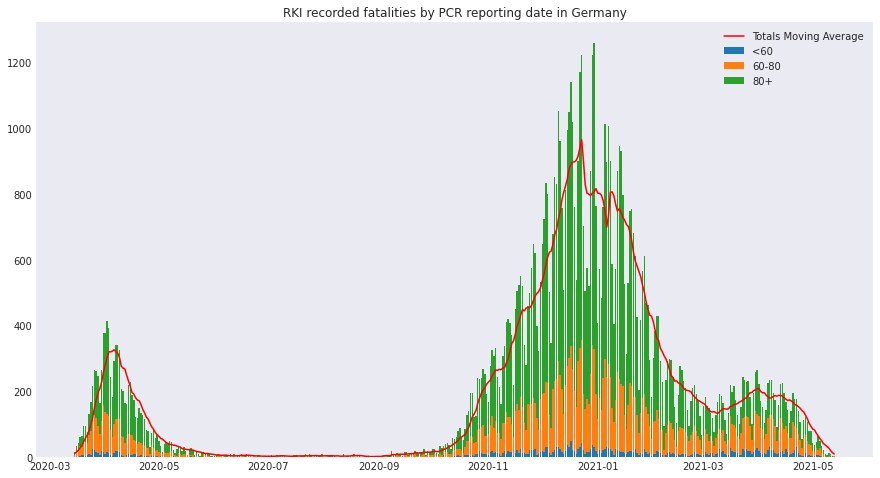

In [49]:
df = pd.DataFrame({'<60':rki_under60.NewDeathRKI, '60-80':rki_60to80.NewDeathRKI, '80+':rki80.NewDeathRKI})
df.fillna(0, inplace=True)
#df['10-01-2020':].plot.bar(label='Fatalities under 60 years', stacked=True)
start_date = '03-15-2020'
x = rki[start_date:].index
plt.bar(x, rki_under60.NewDeathRKI[start_date:], label='<60')
offset = rki_under60.NewDeathRKI[start_date:]
plt.bar(x, rki_60to80.NewDeathRKI[start_date:], label='60-80', bottom=offset)
offset = rki_under60.NewDeathRKI[start_date:] + rki_60to80.NewDeathRKI[start_date:]
plt.bar(x, rki80.NewDeathRKI[start_date:], label='80+', bottom=offset)
#plt.bar(x, rki80.NewDeathRKI[start_date:], label='New Cases')
plt.plot(x, rki.NewDeathRKI.rolling(7).sum()[start_date:] / 7, label='Totals Moving Average', color='red')
plt.legend(loc='best')
plt.title('RKI recorded fatalities by PCR reporting date in Germany')

In [50]:
rki.NewDeathRKI['03-01-2021':'03-01-2021'].sum()

156.0

In [51]:
age_groups_df.columns

Index(['A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+',
       'unbekannt'],
      dtype='object')

Text(0.5, 1.0, 'Growth Germany')

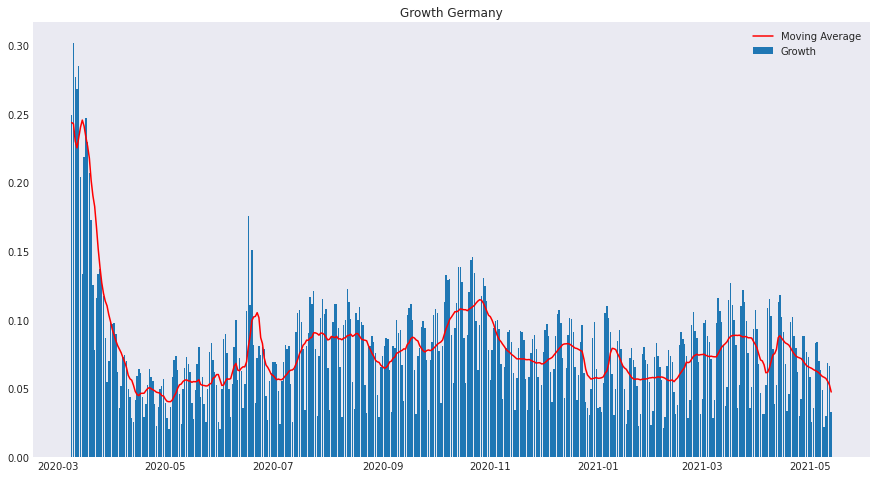

In [52]:
start_date = '03-09-2020'
x = rki[start_date:].index
plt.bar(x, rki.Growth[start_date:], label='Growth')
plt.plot(x, rki.Growth.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Growth Germany')

In [53]:
rki.tail(20)

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality,NewRecovered,NewDeath,Cases,Death,Recovered,ActiveCases,Growth
Meldedatum,,,,,,,,,,,
2021-04-24,18050,107.0,12544,0.592798,17928.0,212.0,3294612,81598.0,2923885.0,289129.0,0.062429
2021-04-25,8738,56.0,5675,0.640879,8777.0,199.0,3303350,81797.0,2932662.0,288891.0,0.030247
2021-04-26,12222,112.0,8179,0.916380,11994.0,338.0,3315572,82135.0,2944656.0,288781.0,0.042323
2021-04-27,25313,122.0,17235,0.481966,26579.0,357.0,3340885,82492.0,2971235.0,287158.0,0.088150
2021-04-28,25082,107.0,17030,0.426601,28429.0,341.0,3365967,82833.0,2999664.0,283470.0,0.088482
2021-04-29,21501,80.0,14690,0.372076,24909.0,276.0,3387468,83109.0,3024573.0,279786.0,0.076848
2021-04-30,19183,81.0,12858,0.422249,35743.0,255.0,3406651,83364.0,3060316.0,262971.0,0.072947
2021-05-01,15135,43.0,5489,0.284110,19166.0,135.0,3421786,83499.0,3079482.0,258805.0,0.058480
2021-05-02,6701,37.0,2012,0.552156,8114.0,197.0,3428487,83696.0,3087596.0,257195.0,0.026054


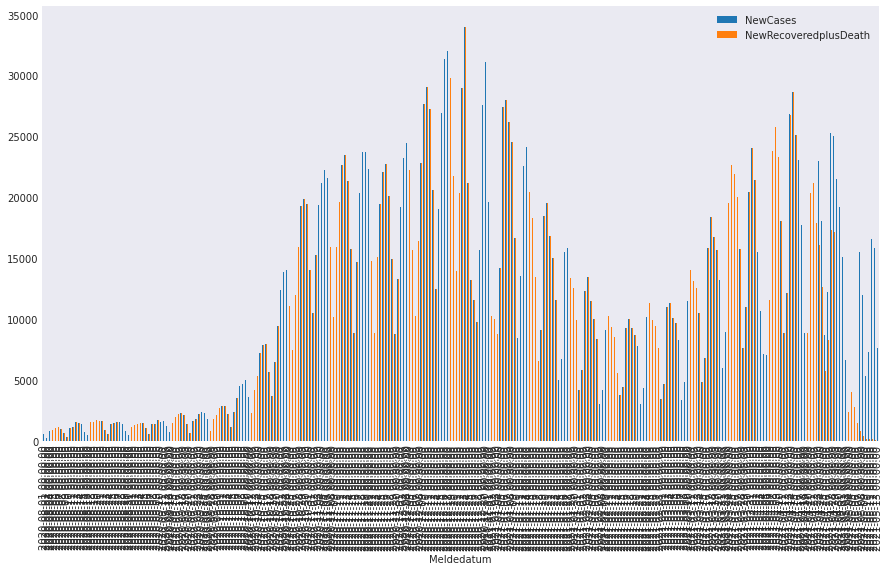

In [54]:
rki['NewRecoveredplusDeath'] = rki.NewRecoveredRKI + rki.NewDeathRKI
rki['08-01-2020':][['NewCases', 'NewRecoveredplusDeath']].plot.bar()
rki.drop('NewRecoveredplusDeath', axis=1, inplace=True)

<AxesSubplot:xlabel='Meldedatum'>

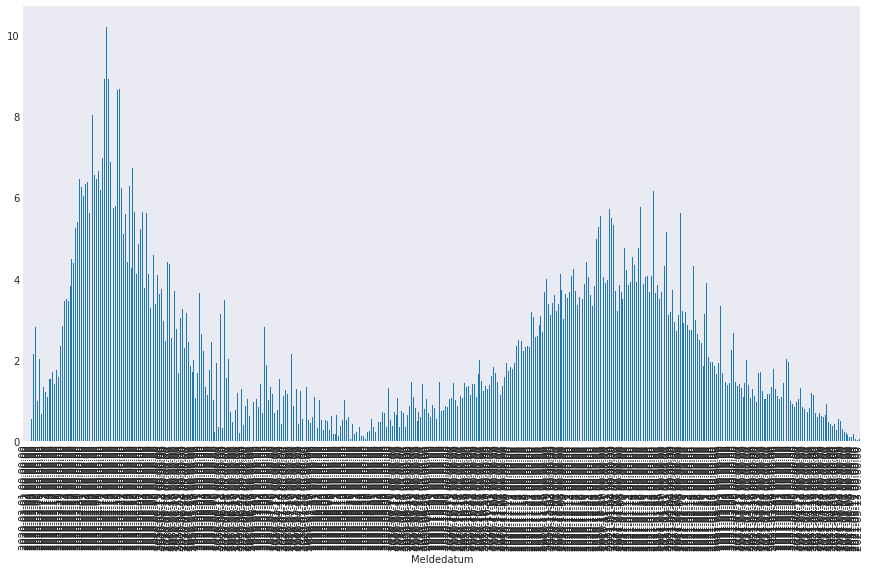

In [55]:
rki['Case Fatality']['03-01-2020':].plot.bar()

<AxesSubplot:xlabel='Meldedatum'>

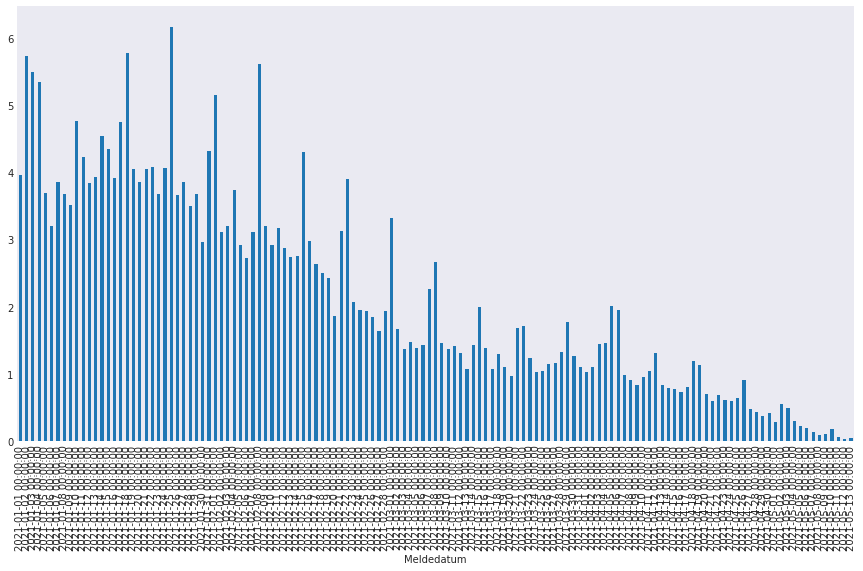

In [56]:
rki['Case Fatality']['01-01-2021':].plot.bar()

Text(0.5, 1.0, 'Case Fatality Germany (%)')

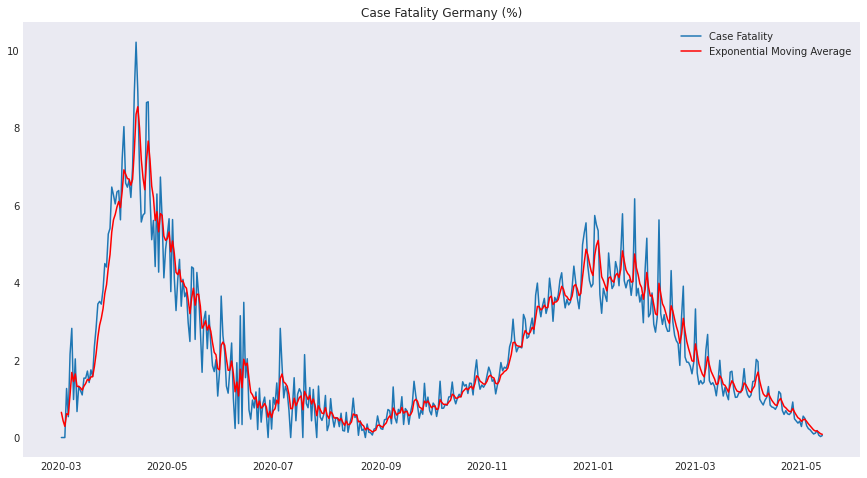

In [57]:
start_date = '03-01-2020'
x = rki[start_date:].index
plt.plot(x, rki['Case Fatality'][start_date:], label='Case Fatality')
plt.plot(x, rki['Case Fatality'].ewm(span=5,adjust=False).mean()[start_date:], label='Exponential Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality Germany (%)')

Text(0.5, 1.0, 'Daily Covid Fatalities (PCR positive) under 60 years Germany')

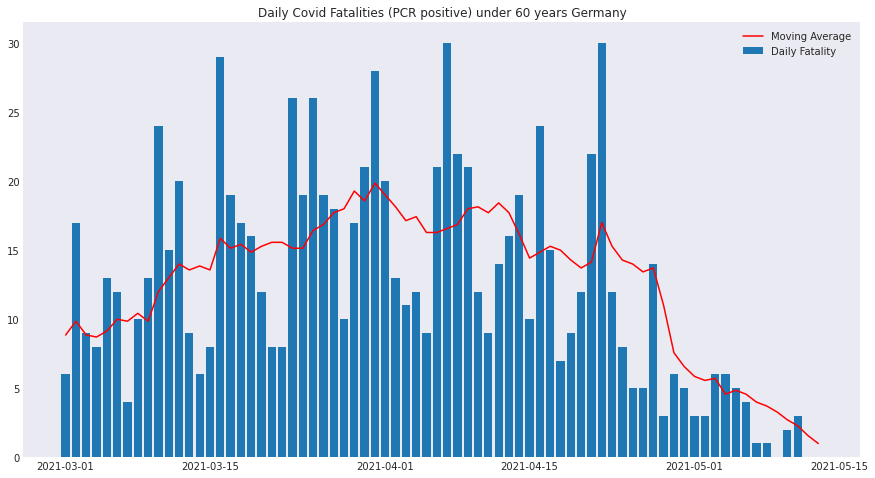

In [58]:
start_date = '03-01-2021'
x = rki_under60[start_date:].index
plt.bar(x, rki_under60.NewDeathRKI[start_date:], label='Daily Fatality')
plt.plot(x, rki_under60.NewDeathRKI.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Daily Covid Fatalities (PCR positive) under 60 years Germany')

Text(0.5, 1.0, 'Case Fatality (PCR positive) under 60 years Germany in %')

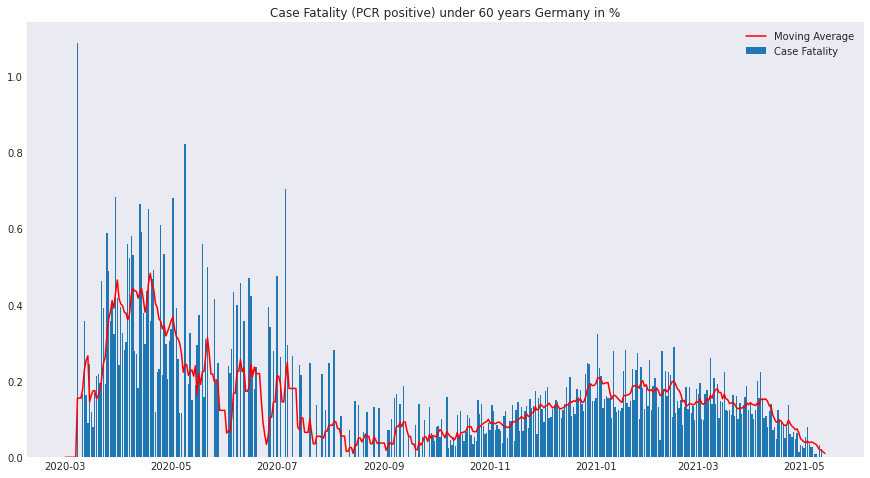

In [59]:
start_date = '03-01-2020'
x = rki_under60[start_date:].index
plt.bar(x, rki_under60['Case Fatality'][start_date:], label='Case Fatality')
plt.plot(x, rki_under60['Case Fatality'].rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality (PCR positive) under 60 years Germany in %')